In [1]:
import pandas as pd
import sys
sys.path.append('../src')
from scrapy import Scrapy
from convert_json_csv import ConvertJSONToCsv

In [2]:
app_ids = ['com.combanketh.mobilebanking', 'com.boa.boaMobileBanking', 'com.dashen.dashensuperapp']

**Collecting App Review Data**

In this step, we initialize the data conversion and scraping classes, then iterate through the list of app IDs to collect review data for each banking app. For every app ID in `app_ids`, we use the `Scrapy` class to fetch and save the review data as a JSON file in the `../data/` directory. This process ensures that raw review data for each app is stored locally for further processing and analysis.

In [3]:

csv = ConvertJSONToCsv()
scrapy = Scrapy()
for app_id in app_ids:
    data = scrapy.save_data_json('../data/',f'data-{app_id}.json', app_id)
   


Data already imported
Data already imported
Data already imported


**Saving the Data to a CSV File**

After collecting and processing the app review data, we save the cleaned DataFrame to a CSV file for further analysis or sharing. This ensures the data is stored in a structured, accessible format.

- Each app's reviews are saved as a separate CSV file named after the bank.
- The CSV files are stored in the `../data/` directory.
- This step is essential for downstream tasks such as data exploration, visualization, or machine learning.

In [4]:
import json
for id in app_ids:
    with open(f'../data/data-{id}.json') as f:
        data = json.load(f)
        print(f'{id} total reviews {len(data)}')
        csv.to_csv(data, f'{id.split('.')[1]}.csv')

com.combanketh.mobilebanking total reviews 7500
com.boa.boaMobileBanking total reviews 1044
com.dashen.dashensuperapp total reviews 449


**Preprocessing and Cleaning App Review Data**

In this step, we preprocess the raw review data for each banking app to ensure consistency and quality for further analysis:

- **Import Required Modules:** We use `pandas` for data manipulation and import custom preprocessing functions `clean_data` and `drop_column`.
- **Iterate Through Each App:** For every app in `app_ids`, we:
    - Load the corresponding CSV file into a DataFrame.
    - Print basic information about the data for inspection.
    - Clean the data using the `clean_data` function.
    - Add `bank` and `source` columns to label the data.
    - Remove unnecessary columns (`userImage`, `userName`, `thumbsUpCount`, `reviewId`) if they exist.
    - Save the cleaned DataFrame back to CSV for downstream tasks.

This ensures that all review datasets are standardized, labeled, and free from irrelevant columns, making them ready for sentiment analysis and further exploration.

In [5]:
import pandas as pd
from preprocess import clean_data, drop_column
filtered_data = None
for id in app_ids:
    bank = id.split('.')[1]
    data = pd.read_csv(f'../data/{bank}.csv')
    print(id.split('.')[1])
    print('='*30)
    print(data.info())
    cleaned_data = clean_data(data)
    cleaned_data['bank'] = bank
    cleaned_data['source'] = 'play-store'
    if {'userImage', 'userName', 'thumbsUpCount'}.issubset(cleaned_data.columns):
        drop_column(cleaned_data,['userImage', 'userName', 'thumbsUpCount'])
    print(data.info())
    cleaned_data.to_csv(f'../data/{bank}.csv')



combanketh
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              7500 non-null   object
 1   userName              7500 non-null   object
 2   userImage             7500 non-null   object
 3   content               7493 non-null   object
 4   score                 7500 non-null   int64 
 5   thumbsUpCount         7500 non-null   int64 
 6   reviewCreatedVersion  6154 non-null   object
 7   at                    7500 non-null   object
 8   replyContent          47 non-null     object
 9   repliedAt             47 non-null     object
 10  appVersion            6154 non-null   object
dtypes: int64(2), object(9)
memory usage: 644.7+ KB
None
columns above the threshold
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype     

**Sentiment Analysis on App Reviews**

This step performs sentiment analysis on the cleaned app review data:

- **Import the Sentiment Analysis Function:** Use `sentiment_analysis` to classify review sentiments.
- **Load Cleaned Data:** For each app, load its cleaned CSV file into a DataFrame.
- **Handle Missing Content:** Remove rows where the review content is missing to avoid errors during analysis.
- **Apply Sentiment Analysis:** If the DataFrame does not already contain a `sentiment` column, apply the sentiment analysis function to each review and add the results as a new column.
- **Combine The Result:** Combine all the dataframes to one dataframe.

In [6]:
from sentiment import sentiment_analysis, label_sentiment
df_list = []
combine_df = None
for id in app_ids:
    bank = id.split('.')[1]
    data = pd.read_csv(f'../data/{bank}.csv')
    # Drop rows where 'content' is NaN to avoid errors in sentiment_analysis
    data = data.dropna(subset=['content'])
    if not {'sentiment'}.issubset(data.columns):
        data['sentiment'] = data['content'].apply(sentiment_analysis)
        data['sentiment_label'] = data['sentiment'].apply(label_sentiment)
    df_list.append(data)
if df_list:
    combine_df = pd.concat(df_list, ignore_index=True)
    print(combine_df.tail())
    print('='*30)
    print(combine_df.head())



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mikiask/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mikiask/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mikiask/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mikiask/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      Unnamed: 0                              reviewId  \
8981         444  650ad650-9821-4bda-a43f-88fec69ab680   
8982         445  cad7278a-410d-4eed-805d-d1a942009cc3   
8983         446  b92aaec0-99b9-49ac-ae55-03c04a52aec5   
8984         447  7ed6c112-916c-44c2-b0ae-af2ff9d8c58f   
8985         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   

                                                content  score          at  \
8981                                               Best      5  2025-01-13   
8982  Waw Great and innovated,user friendly, always ...      5  2025-01-13   
8983                                   It's Best waww 🙏      5  2025-01-13   
8984                              Always one step ahead      5  2025-01-13   
8985       Like Me, I Hope It Works Better Than Before.      5  2025-01-11   

        bank      source  sentiment sentiment_label  
8981  dashen  play-store     0.6369        positive  
8982  dashen  play-store     0.8074        positive  
8983  dashen  play-s

In [7]:
#combine_df.to_csv('../data/combined.csv')
combine_df.head(20)

,Unnamed: 0,reviewId,content,score,at,bank,source,sentiment,sentiment_label
0,0,d0c05687-ddd4-43fb-95a9-08f6358d80a2,really am happy to this app it is Siple to use...,5,2025-06-07,combanketh,play-store,0.6096,positive
1,1,811bf820-3529-433a-9b6d-e624fa23a16a,I liked this app. But the User interface is ve...,2,2025-06-07,combanketh,play-store,-0.2980,negative
2,2,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,combanketh,play-store,0.6369,positive
3,3,8efd71e9-59cd-41ce-8c5c-12052dee9ad0,what is this app problem???,1,2025-06-05,combanketh,play-store,-0.5007,negative
4,4,b12d0383-9b27-4e49-a94d-277a43b15800,the app is proactive and a good connections.,5,2025-06-05,combanketh,play-store,0.6908,positive
5,5,dd9f9e37-177a-46df-b877-d0edaa9aed29,I cannot send to cbebirr app. through this app.,3,2025-06-05,combanketh,play-store,0.0000,neutral
6,6,8e34703c-203c-4180-8b32-bfd0b3f0c871,good,4,2025-06-05,combanketh,play-store,0.4404,positive
7,7,6f0c7fa2-3ce1-4310-b135-54fe0cb9fccd,not functional,1,2025-06-05,combanketh,play-store,0.0000,neutral
8,8,f0dd744a-9409-4619-9800-7ea501571b09,everytime you uninstall the app you have to re...,1,2025-06-04,combanketh,play-store,0.1739,positive
9,9,3949d8e0-7ac4-4b43-b4f4-a45d6a888a85,አካውንት የምናስገባበት ቦታ ስም ጽፈን ነው ከዚህ በፊት የላክንባቸውን አ...,4,2025-06-04,combanketh,play-store,0.0000,neutral


**Aggregating Review Scores by Bank**

The variable `agg_score` groups the combined app review data by both `score` (user rating) and `bank`. This aggregation enables analysis of review distributions and sentiment trends for each bank at different rating levels. It is useful for:

- Calculating the number of reviews per score for each bank.
- Analyzing sentiment or themes within specific score groups.
- Visualizing how user ratings vary across different banking apps.

This grouped data can be further explored to gain insights into customer satisfaction and identify areas for improvement for each bank.

In [8]:
agg_score = combine_df.groupby(['score', 'bank'])

print(agg_score.head())

      Unnamed: 0                              reviewId  \
0              0  d0c05687-ddd4-43fb-95a9-08f6358d80a2   
1              1  811bf820-3529-433a-9b6d-e624fa23a16a   
2              2  be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa   
3              3  8efd71e9-59cd-41ce-8c5c-12052dee9ad0   
4              4  b12d0383-9b27-4e49-a94d-277a43b15800   
...          ...                                   ...   
8592          55  be71f8b9-5329-4235-8c92-9be8be76e5cb   
8631          94  a96e41e8-767a-47e4-831c-2993d37f2906   
8691         154  05ea16ca-9cbf-4683-9ac7-ea4395cf688b   
8775         238  04461449-8fd8-4684-8b12-1bc3aee7f6f2   
8788         251  9c142de4-313b-4287-8a61-1ee79e0a290c   

                                                content  score          at  \
0     really am happy to this app it is Siple to use...      5  2025-06-07   
1     I liked this app. But the User interface is ve...      2  2025-06-07   
2     "Why don’t your ATMs support account-to-accoun...      4  2025-

**Topic Modeling and Theme Extraction from App Reviews**

In this step, we perform topic modeling on the processed app review texts to identify key themes for each bank:

- **Text Preprocessing:** Each review is preprocessed using the `perprocess` function to clean and normalize the text.
- **TF-IDF Vectorization:** The processed reviews are transformed into TF-IDF features, capturing the importance of words and n-grams.
- **Latent Dirichlet Allocation (LDA):** LDA is applied to the TF-IDF matrix to extract latent topics from the reviews.
- **Top Keywords Extraction:** For each topic, the top keywords and n-grams are identified, representing the main themes discussed by users.
- **Theme Aggregation:** The identified themes for each bank are stored in a summary DataFrame (`themes_df`) and merged with the main review DataFrame for further analysis.
- **Result:** This process enables us to understand the most prominent topics and user concerns for each banking app, supporting deeper insights and targeted improvements.

In [9]:
from tf_idf import perprocess,get_top_words_for_topics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
content = []


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
combine_df['processed_review'] = combine_df['content'].apply(perprocess)
all_bank_themes = []
review_topic_assignments = []
for id in app_ids:
    bank = id.split('.')[1]

    # Fit the vectorizer to your processed review content and transform it into TF-IDF features
    tfidf_matrix = tfidf_vectorizer.fit_transform(combine_df.loc[combine_df['bank']==bank]['processed_review'])


    # Get the list of feature names (the actual words/n-grams) that the vectorizer learned
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # --- 4. Extract Top Keywords and N-grams (Overall) ---
    # Sum the TF-IDF scores for each feature across all documents to get an overall importance score
    sum_tfidf = tfidf_matrix.sum(axis=0)

    # Create a Pandas DataFrame to display the features and their summed TF-IDF scores
    tfidf_scores_overall = pd.DataFrame({'feature': feature_names, 'tfidf_sum': sum_tfidf.flat})
    
    # Sort the DataFrame to show the most important features first
    tfidf_scores_overall = tfidf_scores_overall.sort_values(by='tfidf_sum', ascending=False)

    

    
    #combine_df['content'].tail(100)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(tfidf_matrix)

    extracted_themes = get_top_words_for_topics(lda, feature_names, 10)
    identified_themes = ''
    bank_df = pd.DataFrame([{'bank_id':1, 'bank_name':'combanketh'},{'bank_id':2, 'bank_name':'boa'}, {'bank_id':3, 'bank_name':'dashen'}])
    banks = {
        'combanketh': 1,
        'boa':2,
        'dashen':3
    }
    for topic, words in extracted_themes.items():
        identified_themes = ', '.join(words)
        all_bank_themes.append({
                'bank_id': banks[bank],
                'Bank': bank,
                'Topic': topic,
                'Top Words': words
            })
        
    
    themes_df = pd.DataFrame(all_bank_themes)
    
    merge_df = pd.merge(
        combine_df,
        themes_df,
        left_on=['bank'],
        right_on=['Bank'],
        how='inner'
    )

    #print(merge_df.head())
    #combine_df.loc[combine_df['bank']==bank]['dominant_topic_index'] = dominant_topics_indices
    #combine_df.loc[combine_df['bank']==bank]['dominant_topic_name'] = combine_df.loc[combine_df['bank']==bank]['dominant_topic_index'].map(topic_index_to_name)
    #review_topic_assignments.append(combine_df)
    # Store themes for each bank if needed
    
    #combine_df.loc[combine_df['bank']==bank]['identified_themes'] = identified_themes
    #combine_df['identified_themes'] = labels
    #print_top_words(lda, tfidf_vectorizer.get_feature_names_out(), 10)





In [ ]:
drop_column(merge_df, ['Bank', 'Topic'])
merge_df = merge_df.rename({'Top Words':'identified_themes', 'content':'review_text', 'score':'rating', 'reviewId':'review_id'}, axis=1)
#merge_df.groupby(['identified_themes'])
print(merge_df.head())
merge_df.to_csv('../data/final.csv')

       Unnamed: 0                             review_id  \
44925         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   
44926         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   
44927         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   
44928         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   
44929         448  60f2b9c0-9fc9-49d9-97c8-7c1f9aca05fe   

                                        review_text  rating          at  \
44925  Like Me, I Hope It Works Better Than Before.       5  2025-01-11   
44926  Like Me, I Hope It Works Better Than Before.       5  2025-01-11   
44927  Like Me, I Hope It Works Better Than Before.       5  2025-01-11   
44928  Like Me, I Hope It Works Better Than Before.       5  2025-01-11   
44929  Like Me, I Hope It Works Better Than Before.       5  2025-01-11   

         bank      source  sentiment sentiment_label  \
44925  dashen  play-store     0.8074        positive   
44926  dashen  play-store     0.8074        positive   
44927  dashen  play-store 

```markdown
**Saving Processed Reviews and Bank Information to Database**

In this step, the cleaned and enriched review data, along with bank information, is inserted into a database for persistent storage and further analysis:

- The `identified_themes` column is converted to a comma-separated string for each review.
- Bank information (`bank_id`, `bank_name`) is prepared and inserted using `insert_bank`.
- Review data, including review text, rating, sentiment, processed text, identified themes, and bank association, is prepared and inserted using `insert_review`.
- This ensures all processed insights are available in the database for reporting, dashboarding, or advanced analytics.
```

In [ ]:
from dbconnection import connection, insert_review,insert_bank
merge_df['identified_themes'] = merge_df['identified_themes'].apply(lambda x:','.join(x))
bank_insert = [tuple(row) for row in bank_df[['bank_id', 'bank_name']].values]
data_to_insert = [tuple(row) for row in merge_df[['review_id', 'review_text','rating', 'sentiment_label', 'sentiment', 'processed_review', 'identified_themes', 'bank_id']].values]
insert_bank(bank_insert)
insert_review(data_to_insert)


here


## Visuals

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
final_data = pd.read_csv('../data/final.csv')

bank_sentiment = final_data.groupby('bank')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)

# Summary for comparison
cbe_reviews = final_data[final_data['bank'] == 'combanketh']
boa_reviews = final_data[final_data['bank'] == 'boa']

print("\nCBE common positive words:")
print(Counter(' '.join(cbe_reviews[cbe_reviews['sentiment_label'] == 'positive']['processed_review']).split()).most_common(15))
print("\nCBE common negative words:")
print(Counter(' '.join(cbe_reviews[cbe_reviews['sentiment_label'] == 'negative']['processed_review']).split()).most_common(15))
print("\nBOA common positive words:")
print(Counter(' '.join(boa_reviews[boa_reviews['sentiment_label'] == 'positive']['processed_review']).split()).most_common(15))
print("\nBOA common negative words:")
print(Counter(' '.join(boa_reviews[boa_reviews['sentiment_label'] == 'negative']['processed_review']).split()).most_common(15))



CBE common positive words:
[('.', 8265), ('app', 7650), ('Good', 3690), ('good', 3665), (',', 3430), ('!', 2680), ("'s", 1755), ('use', 1735), ('Best', 1640), ('Nice', 1550), ('best', 1365), ('nice', 1330), ('easy', 1330), ('like', 1305), ('application', 1135)]

CBE common negative words:
[('.', 4035), ('app', 1660), (',', 1495), ('!', 1200), ("n't", 1130), ('?', 600), ('update', 540), ("'s", 520), ('transaction', 490), ('bank', 415), ('problem', 400), ('money', 365), ('time', 365), ('work', 355), ('use', 355)]

BOA common positive words:
[('app', 850), ('.', 795), (',', 545), ('good', 380), ('Good', 375), ('!', 265), ("n't", 250), ("'s", 220), ('bank', 200), ('best', 180), ('mobile', 175), ('like', 165), ('banking', 155), ('Best', 140), ('use', 140)]

BOA common negative words:
[('.', 1375), ('app', 965), (',', 750), ("n't", 480), ('!', 340), ('?', 250), ('worst', 220), ("'s", 205), ('banking', 195), ('work', 175), ('bank', 175), ('mobile', 165), ('ever', 160), ('time', 135), ('updat

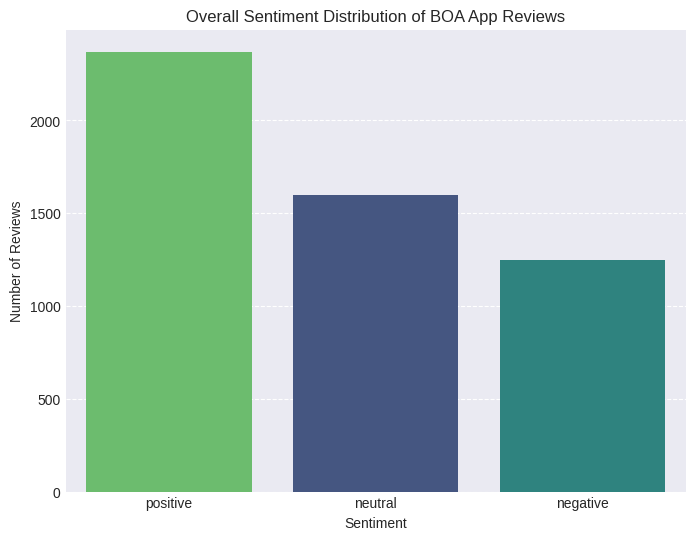

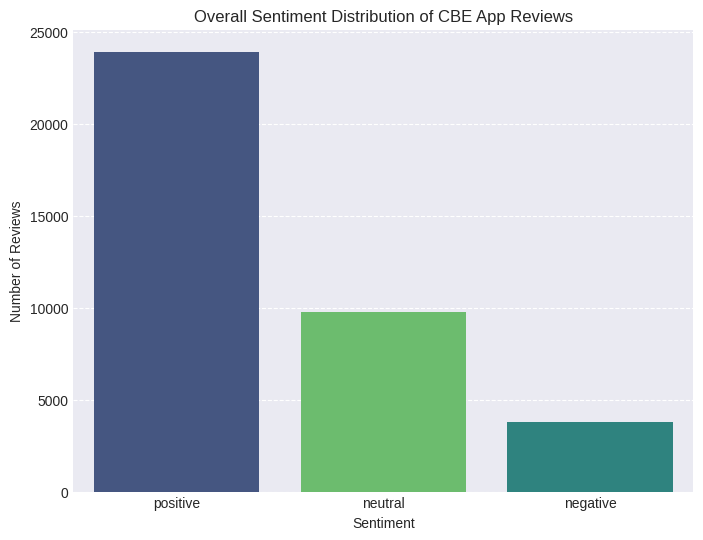

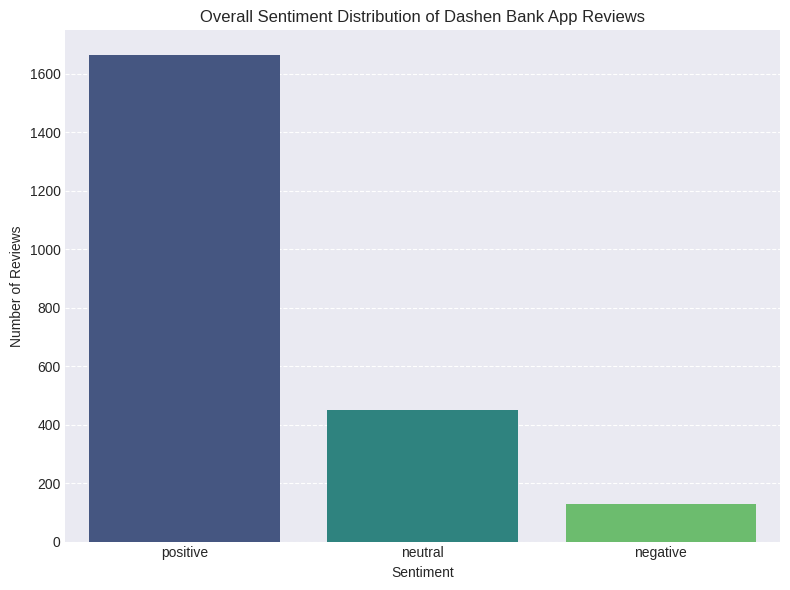

In [13]:
plt.style.use('seaborn-v0_8-darkgrid')

# 5.1. Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', palette='viridis', data=final_data.loc[final_data['bank']=='boa'], order=['positive', 'neutral', 'negative'], hue='sentiment_label')
plt.title('Overall Sentiment Distribution of BOA App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', palette='viridis', data=final_data.loc[final_data['bank']=='combanketh'], order=['positive', 'neutral', 'negative'], hue='sentiment_label')
plt.title('Overall Sentiment Distribution of CBE App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', palette='viridis', data=final_data.loc[final_data['bank']=='dashen'], order=['positive', 'neutral', 'negative'], hue='sentiment_label')
plt.title('Overall Sentiment Distribution of Dashen Bank App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

/tmp/ipykernel_91043/2452917198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_text = ' '.join(final_data.loc[final_data['bank']=='boa'][final_data['sentiment_label'] == 'positive']['processed_review'])
/tmp/ipykernel_91043/2452917198.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_text = ' '.join(final_data.loc[final_data['bank']=='combanketh'][final_data['sentiment_label'] == 'positive']['processed_review'])
/tmp/ipykernel_91043/2452917198.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  positive_text = ' '.join(final_data.loc[final_data['bank']=='dashen'][final_data['sentiment_label'] == 'positive']['processed_review'])


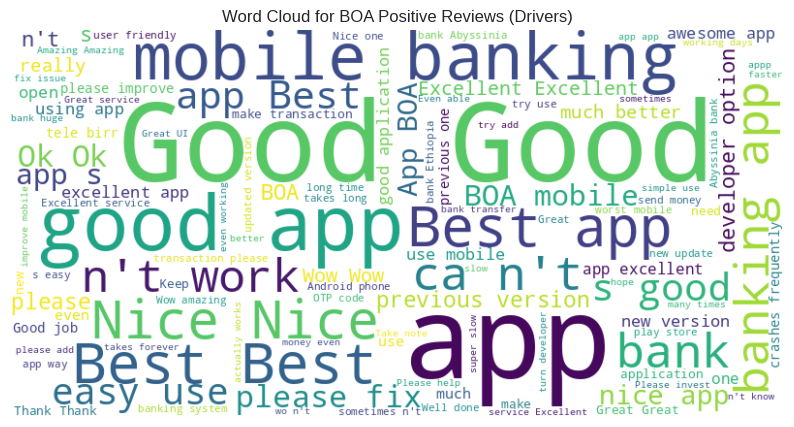

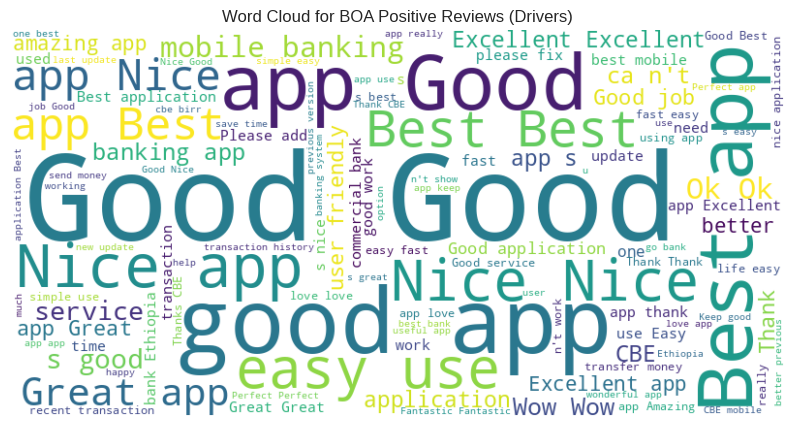

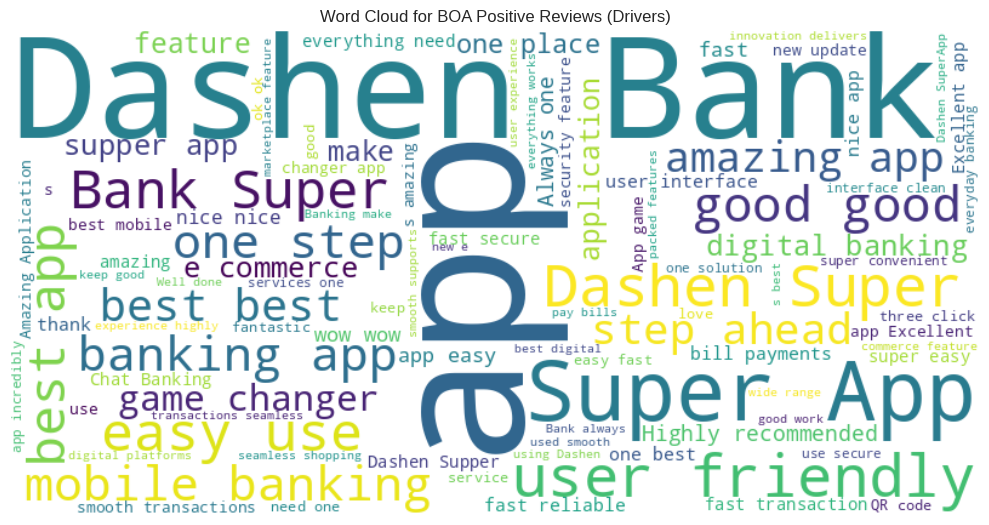

In [19]:
positive_text = ' '.join(final_data.loc[final_data['bank']=='boa'][final_data['sentiment_label'] == 'positive']['processed_review'])
wordcloud_positiveboa = WordCloud(width=800, height=400, background_color='white',
                                min_font_size=10).generate(positive_text)

positive_text = ' '.join(final_data.loc[final_data['bank']=='combanketh'][final_data['sentiment_label'] == 'positive']['processed_review'])
wordcloud_positivecbe = WordCloud(width=800, height=400, background_color='white',
                                min_font_size=10).generate(positive_text)

positive_text = ' '.join(final_data.loc[final_data['bank']=='dashen'][final_data['sentiment_label'] == 'positive']['processed_review'])
wordcloud_positivedashen = WordCloud(width=800, height=400, background_color='white',
                                min_font_size=10).generate(positive_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positiveboa, interpolation='bilinear')
plt.title('Word Cloud for BOA Positive Reviews (Drivers)')
plt.axis('off')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positivecbe, interpolation='bilinear')
plt.title('Word Cloud for BOA Positive Reviews (Drivers)')
plt.axis('off')
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_positivedashen, interpolation='bilinear')
plt.title('Word Cloud for BOA Positive Reviews (Drivers)')
plt.axis('off')
plt.tight_layout()
plt.show()

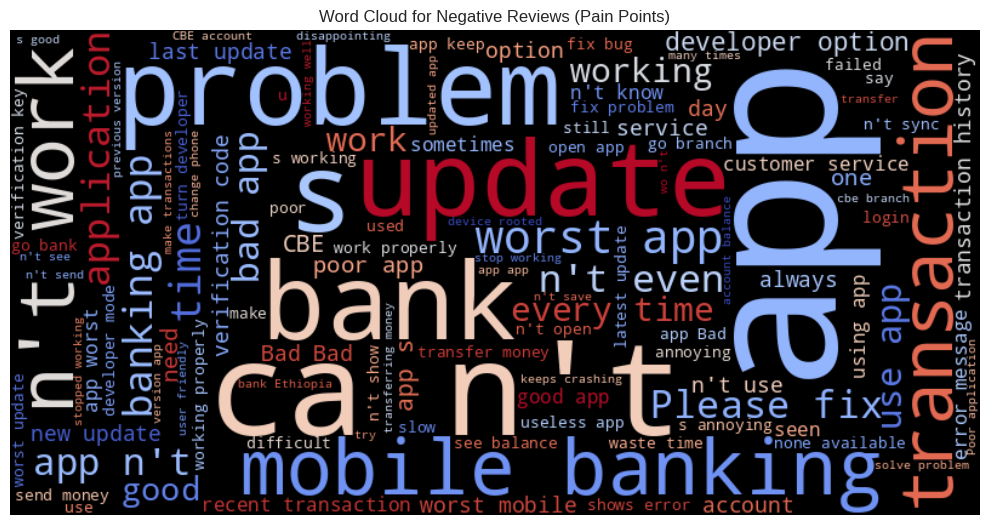

In [15]:
negative_text = ' '.join(final_data[final_data['sentiment_label'] == 'negative']['processed_review'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='coolwarm_r',
                                min_font_size=10).generate(negative_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews (Pain Points)')
plt.axis('off')
plt.tight_layout()
plt.show()

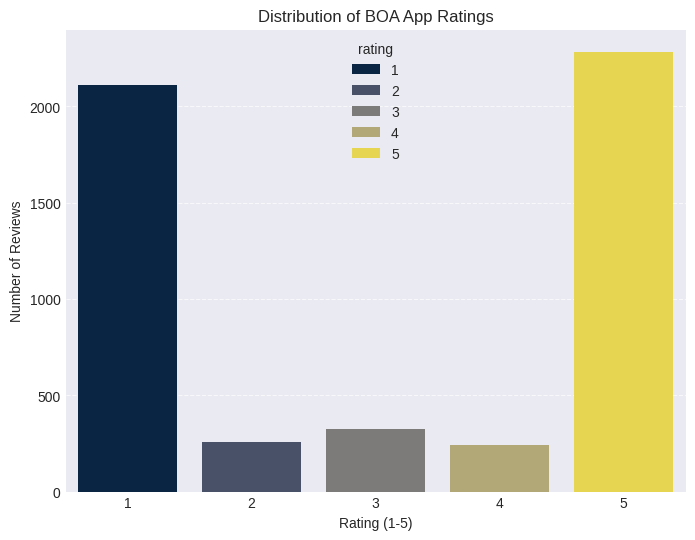

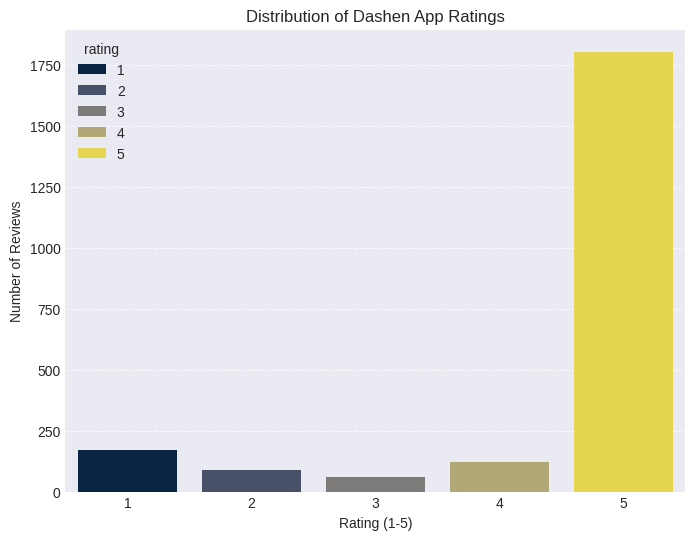

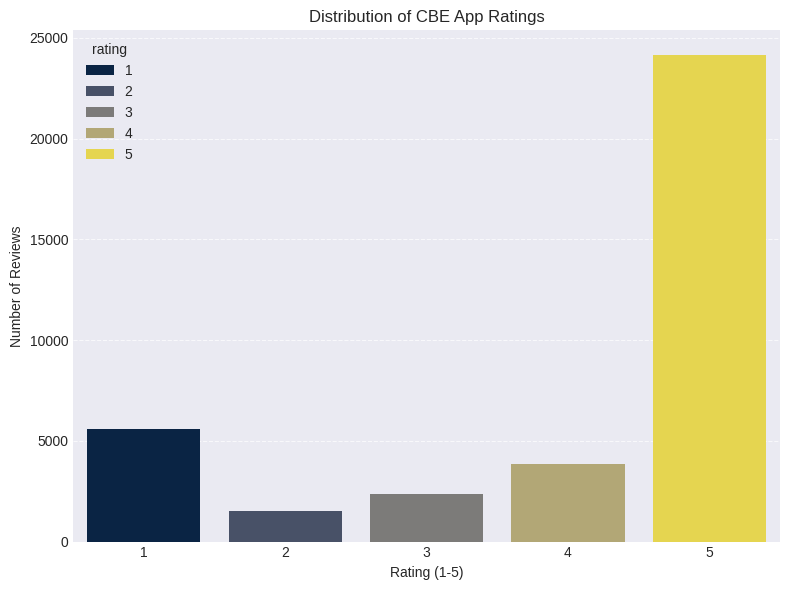

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=final_data.loc[final_data['bank']=='boa'], palette='cividis', hue='rating')
plt.title('Distribution of BOA App Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=final_data.loc[final_data['bank']=='dashen'], palette='cividis', hue='rating')
plt.title('Distribution of Dashen App Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=final_data.loc[final_data['bank']=='combanketh'], palette='cividis', hue='rating')
plt.title('Distribution of CBE App Ratings')
plt.xlabel('Rating (1-5)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

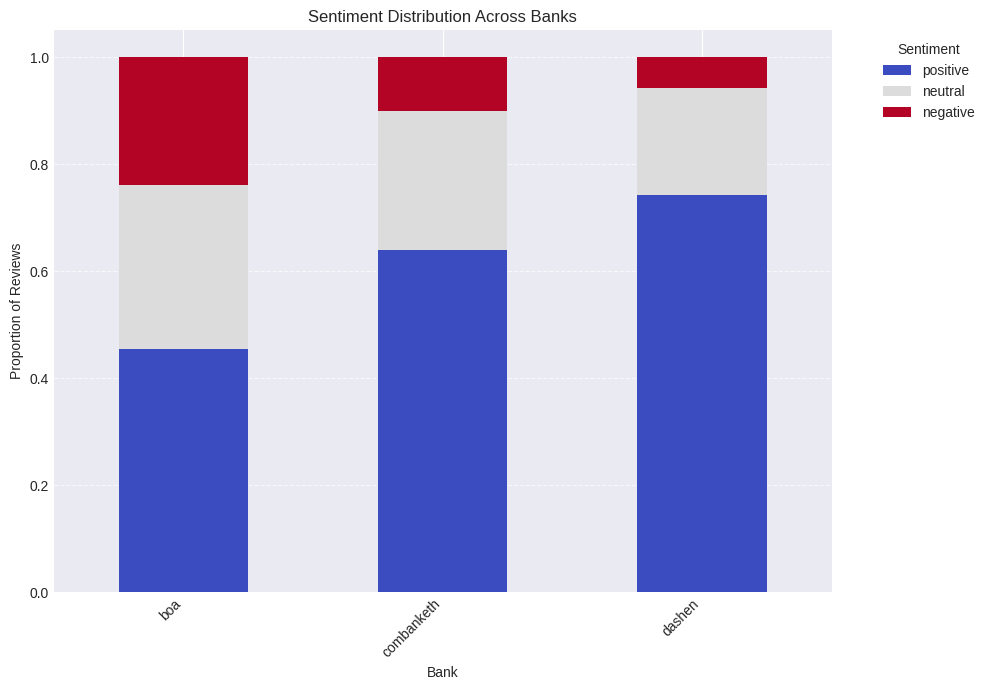

In [ ]:
# 5.5. Sentiment Trends by Bank (Stacked Bar Chart)
sentiment_by_bank = final_data.groupby('bank')['sentiment_label'].value_counts(normalize=True).unstack().fillna(0)
# Reorder columns for consistent stacking
sentiment_by_bank = sentiment_by_bank[['positive', 'neutral', 'negative']]

plt.figure(figsize=(10, 7))
sentiment_by_bank.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 7))
plt.title('Sentiment Distribution Across Banks')
plt.xlabel('Bank')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()